In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets.samples_generator import make_blobs

# Wrangling
import pandas as pd
import numpy as np

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

##### Acquire the data sets
###### from basketballreference.com

In [2]:
df= pd.read_excel('activeplayers.xls')

In [3]:
df=pd.DataFrame(df)

In [4]:
salary= pd.read_excel('salary.xls')

In [5]:
salary= pd.DataFrame(salary)

#### Prep
Must merge the tables (based on player name)
Exclude players not currently active or have nulls in necesary columns

In [6]:
pieces = {'player': df, 'player': salary}

df_sal = pd.concat(pieces)

df_sal.head()

Rk             Player   Tm   2019-20              2020-21  \
player 0   1      Stephen Curry  GSW  40231758        43,006,362.00   
       1   2         Chris Paul  OKC  38506482        41,358,814.00   
       2   3  Russell Westbrook  HOU  38178000        41,006,000.00   
       3   4          John Wall  WAS  37800000        40,824,000.00   
       4   5       James Harden  HOU  37800000        40,824,000.00   

                      2021-22              2022-23              2023-24  \
player 0        45,780,966.00                  nan                  nan   
       1        44,211,146.00                  nan                  nan   
       2        43,848,000.00        46,662,000.00                  nan   
       3        43,848,000.00        46,872,000.00                  nan   
       4        43,848,000.00        46,872,000.00                  nan   

                      2024-25 Signed Using           Guaranteed  
player 0                  nan  Bird Rights       129,019,086.00  
       1                  nan          NaN       124,076,442.00  
       2                  nan  Bird Rights       123,032,000.00  
       3                  nan  Bird Rights       122,472,000.00  
       4                  nan  Bird Rights       122,472,000.00

In [7]:

df_sal= df_sal.drop(df_sal[[ '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', 'Tm', 'Signed Using']], axis=1)

In [8]:
df_sal.rename(columns = {'2019-20':'Salary', 'Guranteed':'FullContract'}, inplace = True)

In [9]:
df_sal.head(1)

,,Rk,Player,Salary,Guaranteed
player,0,1,Stephen Curry,40231758,"129,019,086.00"


In [10]:
dfmain= pd.merge(df_sal, df, on='Player')

dfmain.head(1)

,Rk_x,Player,Salary,Guaranteed,Rk_y,From,To,Tm,Lg,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Stephen Curry,40231758,"129,019,086.00",10,2010,2020,GSW,NBA,34.30,...,0.20,3.10,2.50,23.50,0.48,0.52,0.43,0.58,0.91,0.62


In [11]:
dfmain= dfmain.drop(dfmain[[ 'Rk_y', 'From', 'To', 'Lg']], axis=1)

##### ALL THE IRRELEVANT COLUMNS HAVE BEEN DELETED

##### INITIAL CLUSTER WITH KMEANS- PER TO SALARY

In [12]:

# Set up data

X = dfmain['PER'].values.reshape(-1,1)
y= dfmain['Salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
kmc = KMeans(n_clusters=4, max_iter=1000, n_init=20)

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1],
      dtype=int32)

In [15]:
# Fit
kmc.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

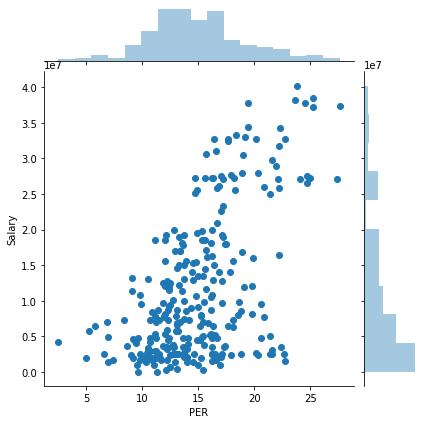

In [16]:
sns.jointplot(x="PER", y="Salary", data=dfmain)

In [17]:
#cluster centers
kmeans.cluster_centers_

array([[22.1804878 ],
       [11.428125  ],
       [16.17894737]])

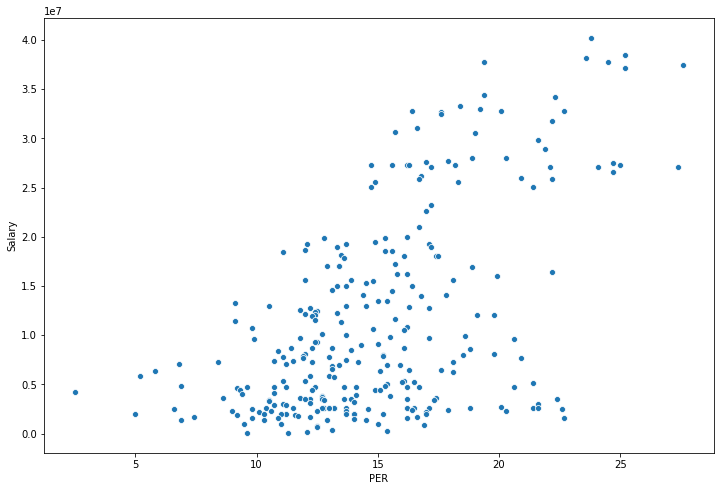

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(dfmain.PER, dfmain.Salary)

   k                       sse
0  1 28,361,057,313,506,264.00
1  2  7,060,622,061,343,477.00
2  3  2,659,184,856,989,124.00
3  4  1,648,394,510,715,203.75
4  5    966,879,810,818,908.38
5  6    640,525,921,830,929.50
6  7    486,722,803,311,259.75
7  8    341,933,224,707,763.06
8  9    260,337,870,506,741.91


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

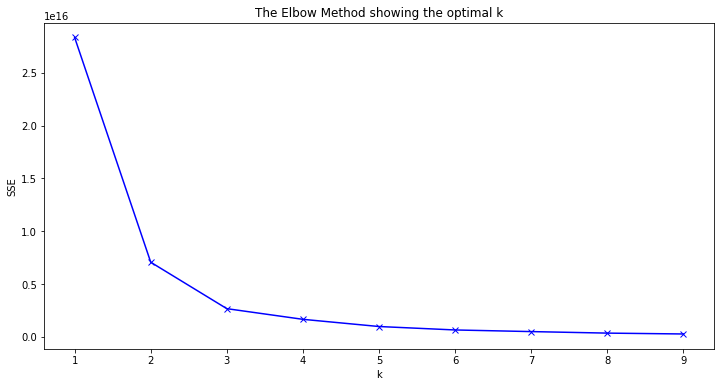

In [30]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfmain[['PER', 'Salary']])
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.figure(figsize=(12, 6))
plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')

In [31]:
#2 and 3 cluster is optimal
estimators = [('2 Clusters', KMeans(n_clusters=2)),
              ('3 Clusters', KMeans(n_clusters=3))]

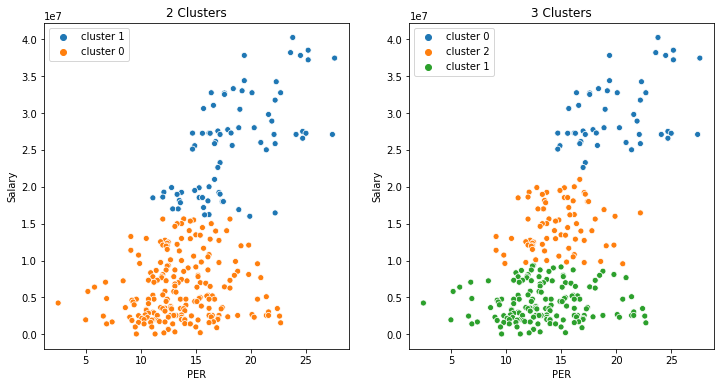

In [33]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

for ax, (title, kmeans) in zip(axs, estimators):
    kmeans.fit(dfmain[['PER', 'Salary']])
    labels = 'cluster ' + pd.Series(kmeans.labels_).astype(str)
    ax.set(title=title)
    sns.scatterplot(dfmain.PER, dfmain.Salary, hue=labels, ax=ax)

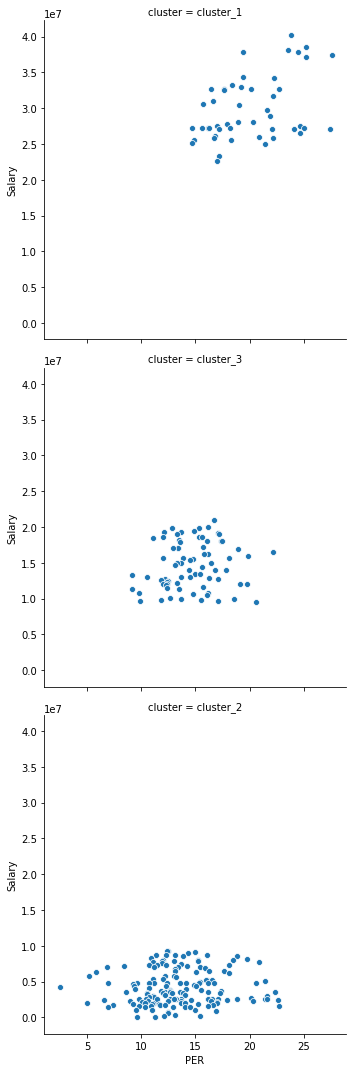

In [36]:
dfmain['cluster'] = kmeans.labels_
dfmain.cluster = 'cluster_' + (dfmain.cluster + 1).astype('str')
sns.relplot(data=dfmain, x='PER', y='Salary', row='cluster')

In [50]:
# 3 Clusters is best for dividing players up by salary


0     cluster_1
1     cluster_1
2     cluster_1
3     cluster_1
4     cluster_1
5     cluster_1
6     cluster_1
7     cluster_1
8     cluster_1
9     cluster_1
10    cluster_1
11    cluster_1
12    cluster_1
13    cluster_1
14    cluster_1
15    cluster_1
16    cluster_1
17    cluster_1
18    cluster_1
19    cluster_1
20    cluster_1
21    cluster_1
22    cluster_1
23    cluster_1
24    cluster_1
25    cluster_1
26    cluster_1
27    cluster_1
28    cluster_1
29    cluster_1
30    cluster_1
31    cluster_1
32    cluster_1
33    cluster_1
34    cluster_1
35    cluster_1
36    cluster_1
37    cluster_1
38    cluster_1
39    cluster_1
40    cluster_1
41    cluster_1
42    cluster_1
43    cluster_1
44    cluster_1
45    cluster_1
46    cluster_1
47    cluster_1
48    cluster_3
49    cluster_3
Name: cluster, dtype: object

In [55]:
dfmain.groupby('cluster').mean()

,Rk_x,Salary,Guaranteed,MP,PER,G,GS,FG,FGA,2P,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
cluster,,,,,,,,,,,,,,,,,,,,,
cluster_1,24.50,"29,925,039.83","89,762,396.75",32.29,20.01,592.23,534.79,6.54,13.87,5.23,...,0.81,2.21,2.39,17.99,0.48,0.51,0.33,0.52,0.79,0.57
cluster_2,263.62,"4,135,893.48","12,016,646.43",25.44,13.47,364.27,204.11,3.97,8.89,2.96,...,0.45,1.43,2.09,10.66,0.45,0.49,0.33,0.51,0.75,0.54
cluster_3,88.05,"14,644,947.33","31,699,187.87",26.14,14.68,477.27,295.24,4.13,9.01,3.19,...,0.55,1.47,2.18,10.98,0.46,0.50,0.31,0.51,0.75,0.55


<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 282
Data columns (total 33 columns):
Rk_x          283 non-null int64
Player        283 non-null object
Salary        283 non-null int64
Guaranteed    282 non-null float64
Tm            283 non-null object
MP            283 non-null float64
PER           283 non-null float64
G             283 non-null int64
GS            283 non-null int64
FG            283 non-null float64
FGA           283 non-null float64
2P            283 non-null float64
2PA           283 non-null float64
3P            283 non-null float64
3PA           283 non-null float64
FT            283 non-null float64
FTA           283 non-null float64
ORB           283 non-null float64
DRB           283 non-null float64
TRB           283 non-null float64
AST           283 non-null float64
STL           283 non-null float64
BLK           283 non-null float64
TOV           283 non-null float64
PF            283 non-null float64
PTS           283 non-null flo